# Women income gap

The objective of the this analysis is to understand the income gap between women and woman and what actions women can take to increase their income

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading data

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.shape

(48842, 15)

In [4]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
#Changing the columns name having '-' into '_' to ease the computation
col = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']

for ind, val in enumerate(col):
    for j in val:
        if '-' in j:
           col[ind] = val.replace('-', '_')

In [6]:
# Reassagning the new names to the data frame
data.columns = col
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational_num  48842 non-null  int64 
 5   marital_status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital_gain     48842 non-null  int64 
 11  capital_loss     48842 non-null  int64 
 12  hours_per_week   48842 non-null  int64 
 13  native_country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Exploratory Data Analysis

### Income gap analysis

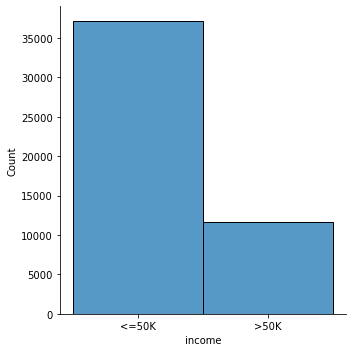

In [8]:
sns.displot(data.income)

<AxesSubplot:xlabel='gender', ylabel='count'>

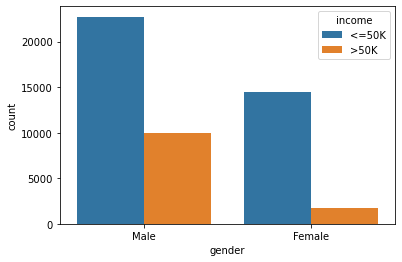

In [7]:
sns.countplot( x = 'gender', hue = 'income', data = data)

In [9]:
# Subsegmenting data to fit the comparisons
high_income = data[data['income'] == '>50K']
women= data[data['gender']=='Female']
men = data[data['gender']=='Female']

In [10]:
w = women.income.value_counts()
m = men.income.value_counts()
gap = pd.DataFrame([w, m], index = ['women', 'men'])
gap['total'] = gap['>50K'] + gap['<=50K']
gap['weight'] = gap['>50K'] / gap['total']
gap.head()

,<=50K,>50K,total,weight
women,14423,1769,16192,0.109251
men,14423,1769,16192,0.109251


### Correlation analysis

In [13]:
data_clean = pd.get_dummies(data)
corr = data_clean.corr()
income_corr = corr['income_>50K']
income_corr = income.sort_values(ascending = False)
income_corr= pd.DataFrame(rel)

In [15]:
income_corr.head(15)

,income_>50K
income_>50K,1.000000
marital_status_Married-civ-spouse,0.445853
relationship_Husband,0.403791
educational_num,0.332613
age,0.230369
hours_per_week,0.227687
capital_gain,0.223013
gender_Male,0.214628
occupation_Exec-managerial,0.210938
occupation_Prof-specialty,0.188793


In [16]:
income_corr.tail(15)

,income_>50K
occupation_?,-0.083921
occupation_Handlers-cleaners,-0.085189
relationship_Other-relative,-0.085601
occupation_Adm-clerical,-0.086475
education_11th,-0.086728
race_Black,-0.090448
marital_status_Divorced,-0.128335
education_HS-grad,-0.130706
relationship_Unmarried,-0.143642
occupation_Other-service,-0.155254


### Feature analysis - age

/Users/judith/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution for high income')

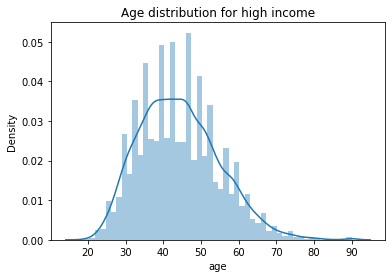

In [22]:
sns.distplot(high_income.age)
plt.title('Age distribution for high income')

/Users/judith/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution for women in workforce')

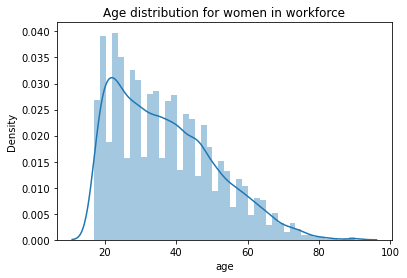

In [56]:
edu = high_income.groupby(['education', 'gender']).size().reset_index().pivot(columns = 'gender',
                                                                                 index = 'education',
                                                                                 values = 0)

In [66]:
edu['tot'] = edu['Female'] + edu['Male']
edu['perc']= edu['Female'] /edu['tot']

In [67]:
edu.head()

gender,Female,Male,tot,perc
education,,,,
10th,4.0,83.0,87.0,0.045977
11th,11.0,81.0,92.0,0.119565
12th,4.0,44.0,48.0,0.083333
1st-4th,NaN,8.0,NaN,NaN
5th-6th,4.0,23.0,27.0,0.148148


Text(0.5, 1.0, 'High Income women education')

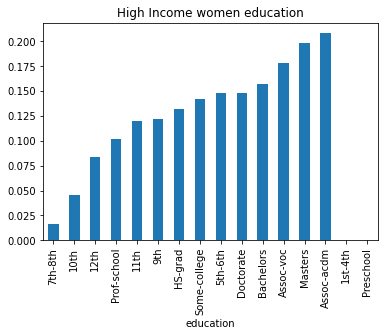

In [68]:
edu.perc.sort_values().plot(kind = 'bar')
plt.title('High Income women education')

### Feature analysis - Occupation

In [69]:
occ = high_income.groupby(['occupation', 'gender']).size().reset_index().pivot(columns = 'gender',
                                                                                 index = 'occupation',
                                                                                 values = 0)

In [72]:
occ['tot'] = occ['Female'] + occ['Male']
occ['perc']= occ['Female'] /occ['tot']

Text(0.5, 1.0, 'High Income women occupation')

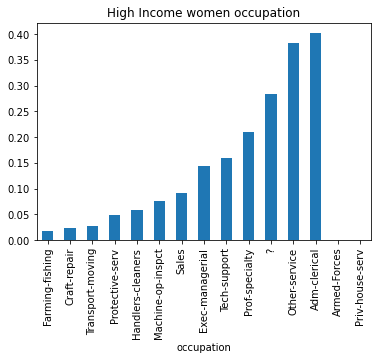

In [74]:
occ.perc.sort_values().plot(kind = 'bar')
plt.title('High Income women occupation')

### Hours per week

/Users/judith/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'hours_per_week distribution for high income')

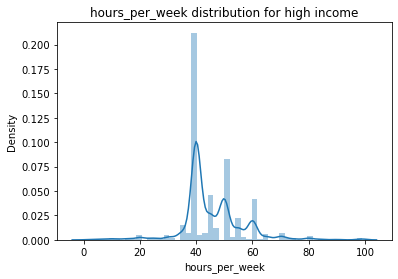

In [77]:
sns.distplot(high_income.hours_per_week)
plt.title('hours_per_week distribution for high income')

/Users/judith/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'hours_per_week distribution for women in workforce')

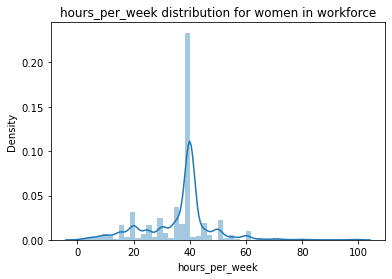

In [80]:
sns.distplot(women.hours_per_week)
plt.title('hours_per_week distribution for women in workforce')

### Marital status

In [81]:
marital = high_income.groupby(['marital_status', 'gender']).size().reset_index().pivot(columns = 'gender',
                                                                                 index = 'marital_status',
                                                                                 values = 0)

In [82]:
marital['tot'] = marital['Female'] + marital['Male']
marital['perc']= marital['Female'] /marital['tot']

Text(0.5, 1.0, 'High Income women marital status')

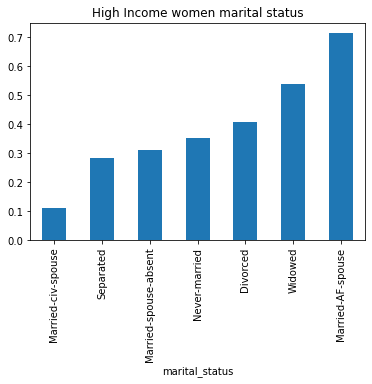

In [83]:
marital.perc.sort_values().plot(kind = 'bar')
plt.title('High Income women marital status')